## This is an Task 2 Solution Worked out Notebook
        -- Solution by Hitesh Padal

### First of all the required libraries are imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

### Importing Data

In [2]:
url = "./student_scores.csv"
student_data = pd.read_csv(url)
student_data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [21]:
student_data.iloc[0,-1]

21

In [11]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [3]:
plt.style.use('seaborn')
# plt.

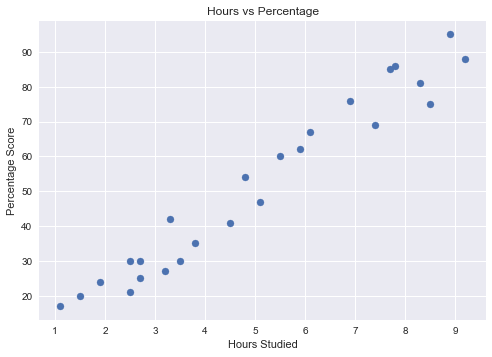

In [13]:
# student_data.plot(x='Hours', y='Scores', style='o')
plt.scatter(student_data['Hours'], student_data['Scores'])
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()
# plt.margins(.02,.05)

**From the above plot of the data we can clearly see that there is a Positive Linear Correlation between 'No.of Hours Studied' and 'Percentage of Score'**

### Preparing the data for Regression Analysis

The next Step is to divide data into 'attributes' (inputs) and 'labels' (outputs) 

[Mathematically termed as independent variables and dependent variables]

In [22]:
x = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

Now that attributes and labels separated, the next step is to split the data into training and test sets. This is done by using Scikit-Learn's built-in train_test_split() method():

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 44)

In [29]:
x_train[1]

array([4.5])

### Training the Algorithm

After splitting the data into training and testing sets, the LinearRegression algorithm will be used to train on the training data

In [32]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X = x_train, y = y_train)   # Here the data to be fit needs to be passed by
                                          # assigning to the corresponding predefined parameters
                                          # this might be because of the feature change in the updated version
                                          # Refer to the documentation of LinearRegression for more info

print('Training complete.')

Training complete.


In [31]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, optional, default True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, optional, default False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |      subt

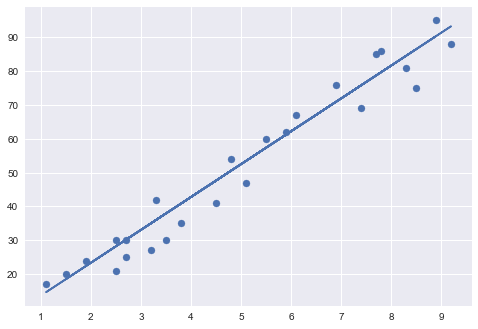

In [59]:
# Plotting the regression line
y_valueToPlot = regressor.coef_ * x + regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, y_valueToPlot);
plt.show()

### Making Predictions
Now the model is trained on LinearRegression and is stored in 'regressor' variable. It's time to make predictions.

In [76]:
print('x_test:\n', x_test,'\n')  # Test data - in hours
y_pred = regressor.predict(x_test)  # Predicting the scores for test data
print('y_pred:\n', y_pred)

x_test:
 [[7.4]
 [3.2]
 [5.9]
 [5.1]
 [3.5]] 

y_pred:
 [75.80143731 35.02903702 61.23986578 53.47369429 37.94135132]


In [80]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference': (y_test - y_pred)})
df

,Actual,Predicted,Difference
0,69,75.801437,-6.801437
1,27,35.029037,-8.029037
2,62,61.239866,0.760134
3,47,53.473694,-6.473694
4,30,37.941351,-7.941351


In [91]:
# Predicting the Score of the Student if the student had studied for 9.5 Hours
hours = 9.25
pred_score = regressor.predict(np.array(hours).reshape(1,-1))
print('No. of Hours studied by Student = ', hours)
print('Predicted Score = ', pred_score)

No. of Hours studied by Student =  9.25
Predicted Score =  [93.76070886]


### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [81]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error:  6.001130833297862


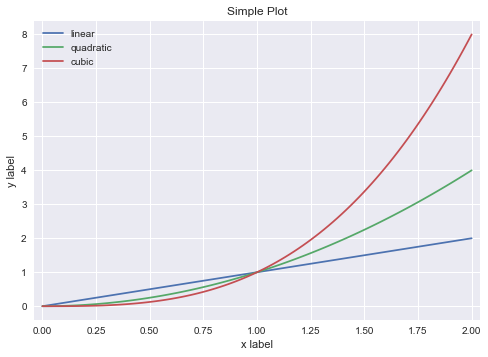

In [9]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
# plt.tight_layout(.1)
plt.margins(.02,.05)